# Preparamos los datos para nuestro script


In [1]:
import urllib, json, pycurl, requests, datetime
from datetime import date
import pandas as pd 
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup #Web scrapping



In [2]:
# Montamos la URL de donde recibiremos nuestra IP pública:
url_ip="http://ip-api.com/json/?fields=status,message,continent,continentCode,country,countryCode,region,regionName,city,district,zip,lat,lon,timezone,offset,currency,isp,org,as,asname,reverse,mobile,proxy,hosting,query"

In [3]:
# Obtenemos la fecha del día en curso:
fecha_hoy = date.today()
print("La fecha de hoy es: "+str(fecha_hoy))

La fecha de hoy es: 2020-10-22


In [4]:
# Obtenemos la fecha del día de mañana:
fecha_manana = fecha_hoy + datetime.timedelta(days=1)
print("La fecha de mañana es:", fecha_manana)

La fecha de mañana es: 2020-10-23


# Obtenemos la IP pública de nuestra máquina con WebScrapping


In [5]:
# Requests conecta con la web y devuelve <Response [200]> si ha conectado correctamente. Lo almacenamos en response.
try:
    response = requests.get(url_ip)
except:
    response = -1000
    print("No se puede comunicar con la web!!")
#print(response)

In [6]:
# Comprobamos si la conexión devuelve el valor de correcta conexión '<Response [200]>'
respuesta=str(response).find("<Response [200]>")
if respuesta != -1:
    print("Se ha conectado correctamente")
else:
    print("Ha habido un error")

Se ha conectado correctamente


In [7]:
# Obtenemos el contenido de la url:
sopa = requests.get(url_ip)

In [8]:
#sopa

In [9]:
# Tratamos los datos como json
sopa_dict = dict(json.loads(sopa.content))
#sopa_dict

In [10]:
print("Podemos ver que nos muestra el valor de la ciudad, que en mi caso es "+sopa_dict['city']+".")
print(sopa_dict['city']+" pertenece a la provincia de "+sopa_dict['regionName']+".")

Podemos ver que nos muestra el valor de la ciudad, que en mi caso es Getafe.
Getafe pertenece a la provincia de Madrid.


In [11]:
# Obtenemos los valores que necesitamos para el tiempo
ciudad = sopa_dict['city']
region = sopa_dict['regionName']
ip_publica = sopa_dict['query']
LAT = sopa_dict['lat']
LON = sopa_dict['lon']
ISP = sopa_dict['isp']

print("la ciudad es "+ciudad)
print("La región es "+region)
#print("La ip pública es "+ip_publica)
#print("La latitud es "+str(LAT))
#print("La longitud es "+str(LON))
#print("El ISP es "+ISP)

la ciudad es Getafe
La región es Madrid


## El tiempo

In [12]:
# La URL de la API
url_tiempo = "https://api.climacell.co/v3/weather/forecast/hourly"

In [13]:
# Llamamos a mi key personal de Climacell, que está en otro directorio.
result = open('./../../Recursos/KeyClimacell.txt')
Key = result.read()
result.close() 
#KeyClimacell

In [14]:
# Montamos la consulta
querystring = {"lat": LAT,"lon": LON,"unit_system":"si","start_time":"now","fields":"temp","apikey": Key}
# Recogemos la "sopa" de datos
sopa_tiempo = requests.request("GET", url_tiempo, params=querystring)

In [15]:
#print(sopa_tiempo)

In [16]:
# Convertimos a json
sopa_tiempo_json = sopa_tiempo.json()

In [17]:
#sopa_tiempo_json

# SEGÚN CUANDO SE LANCE ESTE SCRIPT EL VALOR b SERÁ FECHA_MANANA O FECHA_HOY

In [18]:
# Como vamos a tratar las horas y temperaturas como un diccionario:
th = {}
# Guardamos fecha
b = str(fecha_manana)
print("")
#print("De esta manera obtenemos la hora y la temperatura del día de mañana:")
for i in range (100):
    a = (str(sopa_tiempo_json[i]['observation_time']['value'][:10]))
    #print(a)
    if (a == b):
        th[i] = str(sopa_tiempo_json[i]['observation_time']['value'][11])+str(sopa_tiempo_json[i]['observation_time']['value'][12])+":"+str(sopa_tiempo_json[i]['temp']['value'])
        #print(th[i])

In [19]:
# Pasamos los valores a lista
lista = list(th.values())
# Creamos un diccionario final
temperatura_hora={}

# Introducimos las temperaturas en el nuevo diccionario
for i in range (24):
    #lista[i][:2]
    temperatura_hora[i]=float(lista[i][3:])

In [20]:
#temperatura_hora

In [21]:
#temperatura_hora.items()

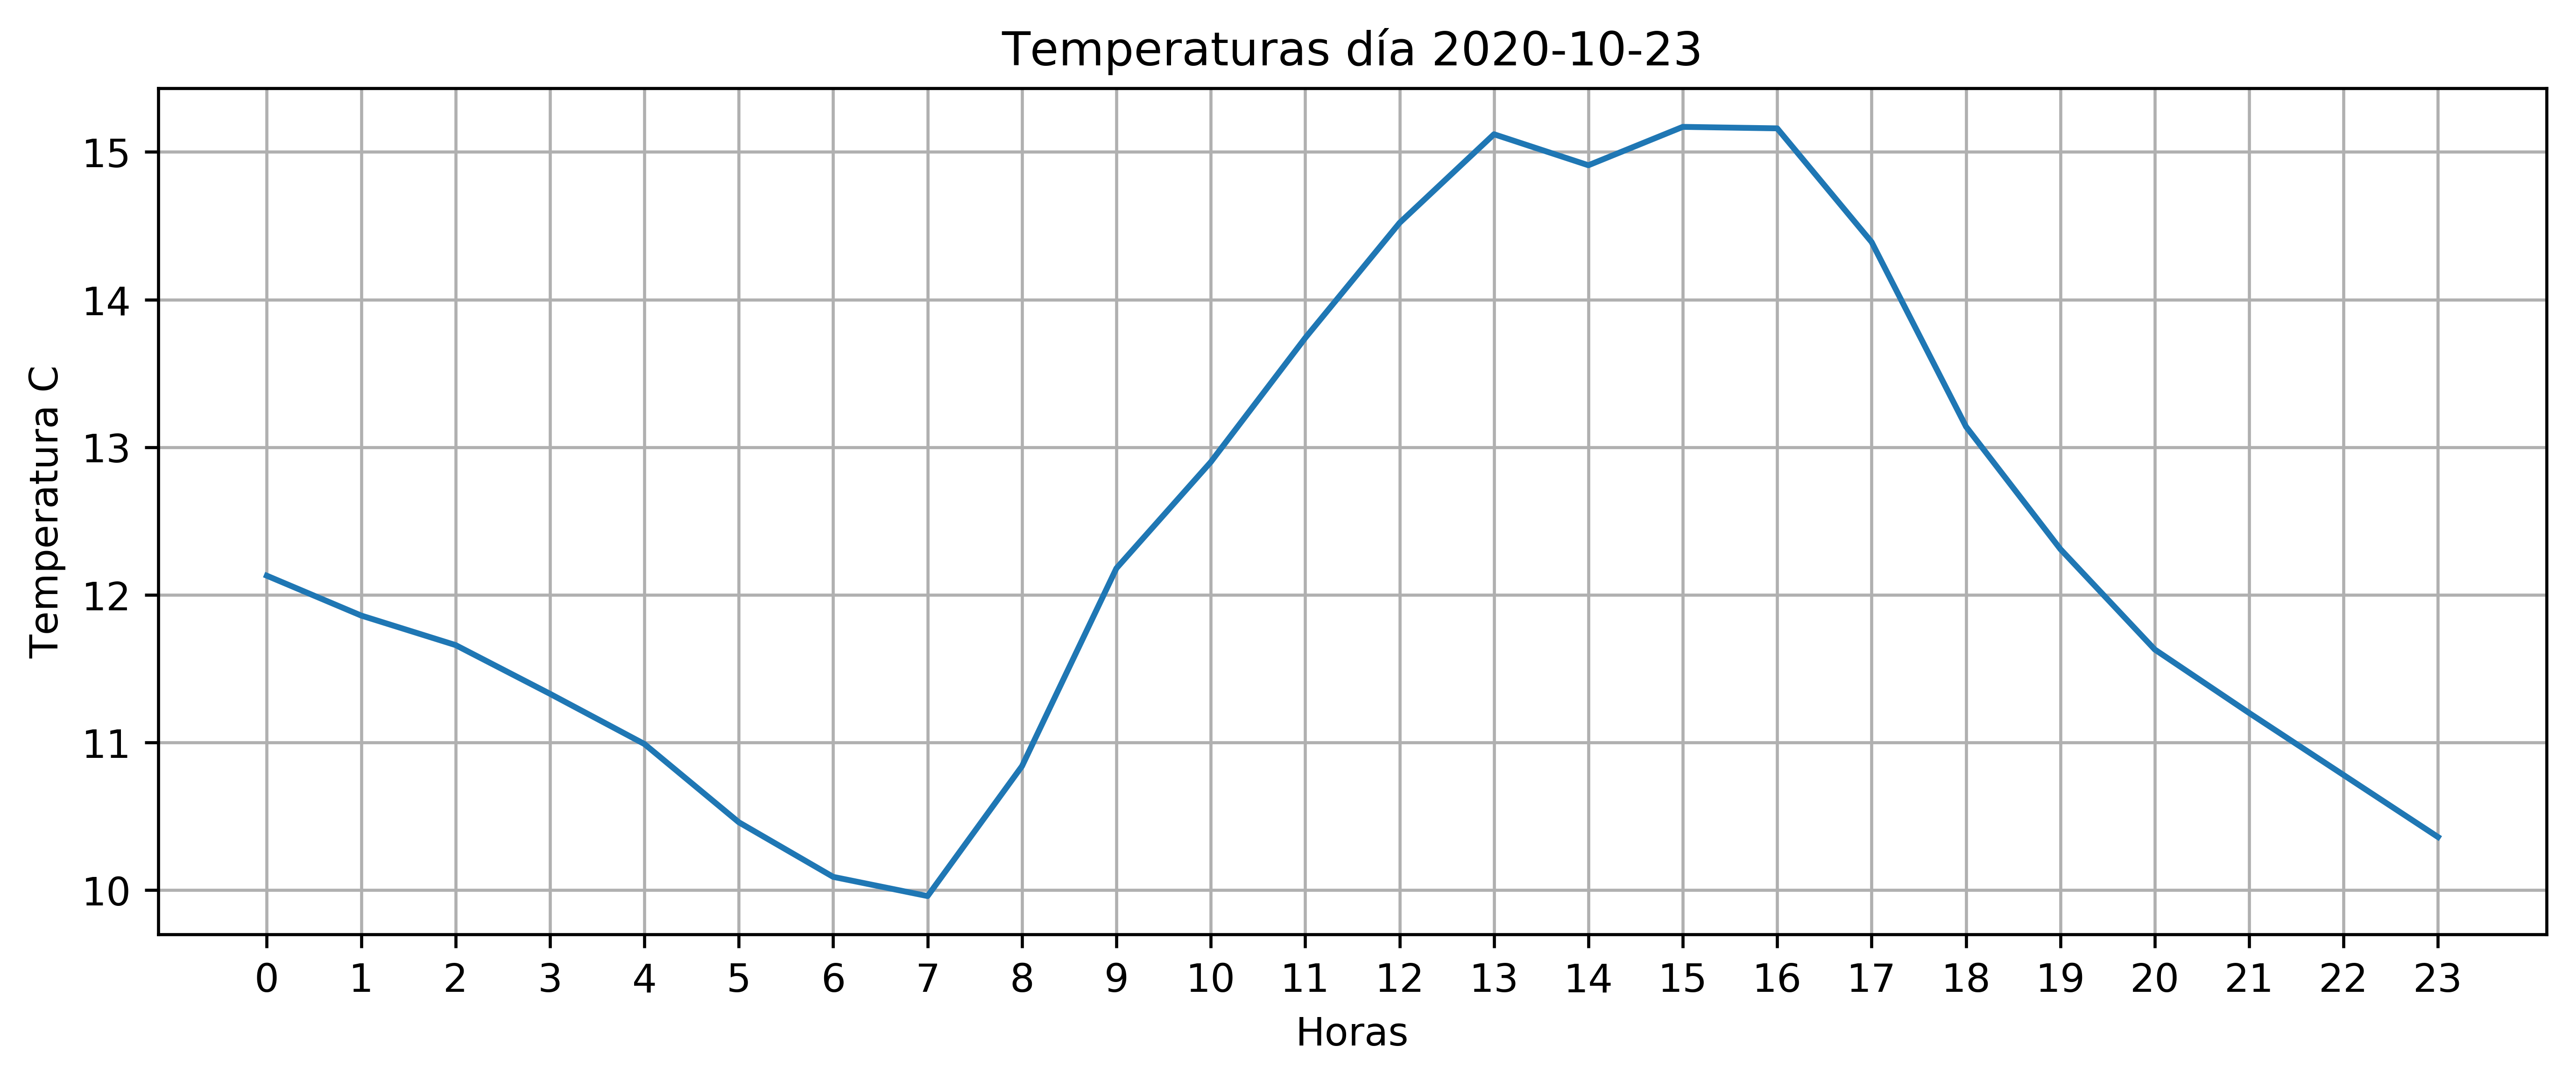

In [22]:
# Ordenamos los valores por la hora
lists = sorted(temperatura_hora.items())

# Hacemos las asignaciones x,y
x, y = zip(*lists) 

fig = plt.figure(dpi=600)
fig.set_figwidth(11)

plt.grid()
plt.title("Temperaturas día "+b)
plt.xlabel("Horas")
plt.ylabel("Temperatura C")
plt.xticks([i for i in range(24)]) 

# Corrección y graficado de las temperaturas del día de mañana
plt.plot(x, y)

# Exportamos imagen con la fecha como nombre
plt.savefig(b+".png")

# Mostramos tabla
plt.show()

In [23]:
## Ahora, una vez obtenidos estos datos podemos enviarlos a través de una API de mensajería como la disponible en los BOTs 
## de Telegram.

# De esta manera, cuando queramos, desde el propio bot, podemos ordenar una nueva solicitud a la API y que nos devuelva
# las temperaturas del día siguiente pudiendo determinar temperaturas máximas, mínimas o enviar el grafo en formato imagen.

In [24]:
# Calculamos la hora a la que tenemos más temperatura
hora_maxima = max(temperatura_hora, key=temperatura_hora.get)
# Mostramos la temperatura máxima (a la hora donde se cumple)
temperatura_hora[hora_maxima]

15.17

In [25]:
# Calculamos la hora a la que tenemos menos temperatura
hora_minima = min(temperatura_hora, key=temperatura_hora.get)
# Mostramos la temperatura mínima (a la hora donde se cumple)
temperatura_hora[hora_minima]

9.96